In [53]:
import socket
import time
import json
import PIL.Image as Image
import io
import base64
from io import BytesIO
from base64 import decodestring

In [54]:
host, port =  "127.0.0.1" , 8053
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((host,port))

In [55]:
transaction_dict = {
            "MsgType": "Transcation",
            "Version": "0.0.3",
            "InputControlType": "Other",
            "LevelReload": "false",
            "ActiveCamera": 1,
            "IsActive":"true",
            "SunLatitude": -500.39,
            "SunLongitude": -1650.4,
            "SunHour": 16,
            "SunMinute": 5,
            "CaptureScreen": "true",
            "ScreenCaptureType":0
        }


In [56]:
def recvall(sock):
    BUFF_SIZE = 4096 # 4 KiB
    data = b''
    while True:
        part = sock.recv(BUFF_SIZE)
        data += part
        if len(part) < BUFF_SIZE:
            # either 0 or end of data
            break
    return data

In [57]:
for _ in range(100000):
    data = json.dumps(transaction_dict)
    try:    
        sock.sendall(data.encode("utf-8"))
        data = recvall(sock)
        data = eval(data)
        print(len(data["ScreenCapture"]))
    except Exception as e:
        print(">>>>>>>>>>>>",e)
    time.sleep(0.01)

>>>>>>>>>>>> name 'null' is not defined
56596
56596
62744
62744
62744
62508
62508
62888
62888
62696
62696
62928
62868
62868
62952
62952
62952
62984
62984
62740
62740
62876
62876
62624
62624
62776
62776
62572
62572
63020
63020
62820
62820
62836
62836
62620
62452
62452
62860
62860
62564
62564
62716
62716
62716
62584
62584
62900
62900
62900
62644
62644
63052
63052
63052
62940
62940
62536
62536
62940
62940
63276
63276
63208
63208
63208
63248
63248
63248
63088
63088
63328
63328
63536
63536
63052
63356
63356
63356
63140
63140
63488
63488
63056
63056
63320
63320
63320
63524
63524
63104
63104
63060
63464
63464
63356
63356
63356
63156
63156
63204
63204
63160
63160
63160
63212
63212
63344
63344
63344
63196
63332
63332
63332
63336
63336
63024
63024
63084
63084
63084
63084
63080
63080
63080
63080
63080
63144
63144
63144
63144
62808
62808
62808
62892
62892
63136
63136
63276
63276
63248
63248
63456
63420
63420
63420
63524
63524
63292
63292
63292
63248
63248
63388
63388
63436
63436
63040
63040
63040


In [40]:
data

{'AGL': 0.0,
 'MSL': 4.9548,
 'CurrentRPM': 0.0,
 'MaxRPM': 2500.0,
 'MaxPower': 5000.0,
 'CurrentPower': 0.0,
 'CurrentFuel': 0.0,
 'CurrentSpeed': 0.0116229337,
 'BankAngle': 3.82071781,
 'PitchAngle': 18.6217537,
 'ScreenCapture': 'iVBORw0KGgoAAAANSUhEUgAAAPoAAADICAIAAABOPGvMAAAIOUlEQVR4Ae2d7XKbMBBF47bT93/eznRSWkqGD4OQuGiv0MkfBwKrq7Mniux27NfrQ/z1Ka5HOQhkEDj2+VtGJS6FQOMExLqztDfuw8Pji3V/OC2m1zgBdG+8gcTPIaDUnZ1MDnmuDSCg1D0gPkNCIIcAuufQ4trGCch0ZyfTuAldxJfp3gUtJtk4AY3uLO2Na9BLfI3uvdBinvYEjldedLdvIAF1BAS6H/8+6aJSCQJXCQh0vxqB+yFQiwC61yLNOAYErurOTsagiUQ4S+Cq7mfH4ToIGBBAd4MmEKEWgUu6s5Op1SbG0RC4pLsmAlUgUIsAutcizTgGBNDdoAlEqEWgXHc27rV6xDgyAuW6yyJQCAK1CKB7LdKMY0CgUHd2Mga9I0I2gULds8fhBggYEEB3gyYQoRYBdK9FmnEMCJTozsbdoHFEKCFQonvJONwDAQMC6G7QBCLUIoDutUgzjgGBbN3ZuBt0jQiFBLJ1LxyH2yBgQADdDZpABCmBgw0IuktJU8yAwMGnkeXpfvB7YzBNIkAgQSBP90QxfgwBbwLo7t0f0kkJoLsUJ8W8CWTozsbdu5WkSxPI0D1djCsg4E0A3b37QzopAXSX4qSYNwF09+4P6aQEzurO81QpdorFEDire0w6RoWAlAC6S3FSzJsAunv3h3RSAuguxUkxbwLo7t0f0kkJnNKdl2WkzCkWRuCU7mHpGBgCU

In [41]:
im = Image.open(BytesIO(base64.b64decode(data["ScreenCapture"])))


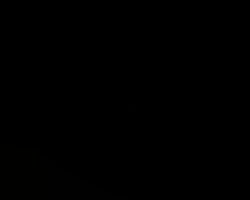

In [42]:
im

In [ ]:
sock.close()